In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
weather = pd.read_csv(r"weatherAUS5000.csv", index_col = 0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


### Preprocessing: train/test split, missing value, description, etc

In [3]:
#seperate X and y
X = weather.iloc[:,:-1]
y = weather.iloc[:,-1]

In [4]:
X.info() #found here are missing value, and some types are not numerial yet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Location       5000 non-null   object 
 2   MinTemp        4979 non-null   float64
 3   MaxTemp        4987 non-null   float64
 4   Rainfall       4950 non-null   float64
 5   Evaporation    2841 non-null   float64
 6   Sunshine       2571 non-null   float64
 7   WindGustDir    4669 non-null   object 
 8   WindGustSpeed  4669 non-null   float64
 9   WindDir9am     4651 non-null   object 
 10  WindDir3pm     4887 non-null   object 
 11  WindSpeed9am   4949 non-null   float64
 12  WindSpeed3pm   4919 non-null   float64
 13  Humidity9am    4936 non-null   float64
 14  Humidity3pm    4880 non-null   float64
 15  Pressure9am    4506 non-null   float64
 16  Pressure3pm    4504 non-null   float64
 17  Cloud9am       3111 non-null   float64
 18  Cloud3pm

In [5]:
X.isnull().mean()  # find missing value ratio by using  isnum.sum(True)/X.shape[0]
#By knowing this, we need to have different way to fill NAA

Date             0.0000
Location         0.0000
MinTemp          0.0042
MaxTemp          0.0026
Rainfall         0.0100
Evaporation      0.4318
Sunshine         0.4858
WindGustDir      0.0662
WindGustSpeed    0.0662
WindDir9am       0.0698
WindDir3pm       0.0226
WindSpeed9am     0.0102
WindSpeed3pm     0.0162
Humidity9am      0.0128
Humidity3pm      0.0240
Pressure9am      0.0988
Pressure3pm      0.0992
Cloud9am         0.3778
Cloud3pm         0.3976
Temp9am          0.0066
Temp3pm          0.0176
dtype: float64

In [6]:
np.unique(y) # or y.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
y.isnull().sum() # no missing value in y columns

0

In [8]:
#train/test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 420)

#recover index: because train_test_split is random assign train and test
for i in [Xtrain, Xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

In [9]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,17.0,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,7.0,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,17.0,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,11.0,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4


#### Check inbalnce samples? : small inblance, not huge differece

In [10]:
ytrain.value_counts()

No     2704
Yes     796
Name: RainTomorrow, dtype: int64

In [11]:
ytest.value_counts()

No     1157
Yes     343
Name: RainTomorrow, dtype: int64

In [12]:
ytrain.value_counts()[0]/ ytrain.value_counts()[1] # 3:1 ratio

3.3969849246231156

In [13]:
#we need to label (sklearn.preprocessing import LabelEncoder)

encoder = LabelEncoder().fit(ytrain) #instantiate : use ytrain
#encoder is using ytrain's model to modeling. Two classes: Yes, and No

In [14]:
#using training set to trian, then use training and test set to transform seperately

ytrain = pd.DataFrame(encoder.transform(ytrain)) #encoder knows Yes and No label and transform ytrain to same form
ytest = pd.DataFrame(encoder.transform(ytest))

# if unrecognize label show on test set that not showing on training set, i.e. Yes, No, Unknown (in test)
# then encoder will raise error: not seen label

In [15]:
#Now, ytrain.head()
ytrain.head() #and ytest.head() only contain label 0 and 1

,0
0,0
1,0
2,0
3,1
4,0


In [16]:
# ytrain.to_csv("you want to save in the file") - for in case overlapping 

## Features explores: skewness? anomaly? Build feature matrix

In [17]:
#Describle statisical:

Xtrain.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


1. Explore can some features has negative values? is that make any sense?
2. Explore min and 1%, 99% and max for skewness of data distribution. 

*Rainfall, right skew; 

In [18]:
Xtest.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


1. If you fond anomaly datas, first, explore the frequent of show. i.e. if rainfall is negative value, does it appear once or multiple times? (If appears only once, typing mistake. Delete)

2. if anomaly appears multiple times, need to check with team; anomaly data are useless and may affect prediction. 
3. if anomaly data account 10% of dataset, may have problem. Need to fill anomaly data with no noise data. 

### 1. Processing problematic feature: Data

Does the date we collect on a data have anything to do with our weather? We can explore what the nature of our collection date is:

In [19]:
#first we know data is object type as string, we can confirm by:
type(Xtrain.iloc[0,0])

str

1. When we cannot process a **date** type, we first consider whether it is a continuity variable or a categorical variable.
2. (1) date is not unique, data(for each data of month, will repeat)
   (2) after seperate train/test set, data is not continue but discrete.
   (3) A certain day of the year tends to rain? Or tend not to rain?
   (4) It is not the date that influences whether it rains or not, but rather the sunshine time, humidity, temperature and so on
   (5) Just looking at the date doesn't seem to have a direct effect on our judgment.
   (6) If we treat it as a continuous variable, the algorithm will assume that it is a series of Numbers from 1 to 3000 and will not realize that it is a date

In [20]:
Xtrainc = Xtrain.copy()

In [21]:
Xtrainc.sort_values(by="Location")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
2796,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,13.0,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7
2975,2012-08-17,Adelaide,7.8,13.2,17.6,0.8,NaN,SW,61.0,SW,...,20.0,28.0,76.0,47.0,1012.5,1014.7,NaN,NaN,8.3,12.5
775,2013-03-16,Adelaide,17.4,23.8,NaN,NaN,9.7,SSE,46.0,S,...,9.0,19.0,63.0,57.0,1019.9,1020.5,NaN,NaN,19.1,20.7
861,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3
2906,2015-08-24,Adelaide,9.2,14.3,0.0,NaN,NaN,SE,48.0,SE,...,17.0,19.0,64.0,42.0,1024.7,1024.1,NaN,NaN,9.9,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,2009-05-08,Woomera,9.2,20.6,0.0,5.2,10.4,ESE,37.0,SE,...,19.0,19.0,64.0,34.0,1030.5,1026.9,0.0,1.0,13.7,20.1
1984,2014-05-26,Woomera,15.5,23.6,0.0,24.0,NaN,NNW,43.0,NNE,...,9.0,26.0,49.0,37.0,1014.2,1010.3,7.0,7.0,18.0,21.5
1592,2012-01-10,Woomera,16.8,26.7,0.0,10.0,5.3,SW,46.0,S,...,20.0,22.0,52.0,33.0,1019.1,1016.8,4.0,6.0,18.3,24.9
2824,2015-11-03,Woomera,16.2,28.5,7.8,4.2,4.5,WSW,80.0,NE,...,26.0,50.0,76.0,53.0,1009.6,1006.8,6.0,7.0,20.5,26.2


In [22]:
Xtrain.iloc[:,0].value_counts()

2014-05-16    6
2015-10-12    6
2015-07-03    6
2013-12-20    5
2014-07-26    5
             ..
2010-02-28    1
2015-10-23    1
2014-01-26    1
2009-10-29    1
2009-05-04    1
Name: Date, Length: 2141, dtype: int64

In [23]:
Xtrain.iloc[:,0].value_counts().count()
#If we treat it as a categorical variable, there are too many categories, there are 2141 classes.
#if we change it to a numeric type, it will be directly treated as a continuous type variable, 
#if we make it a dummy variable, the dimension of our feature will explode

2141

(1) One way is to delete this feature.

In [24]:
#Xtrain = Xtrain.drop(["Date"],axis=1)
#Xtest = Xtest.drop(["Date"],axis=1)

(2) Other way is to combine other features, such as repeated data observations at different location, or rainfall feature.

In [25]:
#from description, we see that in rainfall, below 90% has only 0.8 rain but above 90% that has 5mm rain.
#first check rainfall has any NAN value?
Xtrain["Rainfall"].isnull().sum()

33

In [26]:
#so here we can try to use 5 as spliter 
#Add new column RainToday: if No rain, copy nan 

Xtrain.loc[Xtrain["Rainfall"] >= 5,"RainToday"] = "Yes" 
Xtrain.loc[Xtrain["Rainfall"] < 5,"RainToday"] = "No" 

Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan # if nan, just copy
Xtrain.head() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-08-24,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,2016-12-10,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,2010-04-18,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,2009-11-26,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,2014-04-25,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [27]:
Xtest.loc[Xtest["Rainfall"] >= 5,"RainToday"] = "Yes" 
Xtest.loc[Xtest["Rainfall"] < 5,"RainToday"] = "No" 

Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

Xtest.head() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-01-23,NorahHead,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,2009-03-05,MountGambier,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,No
2,2010-03-05,MountGinini,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-10-26,Wollongong,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,2016-11-28,Sale,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


1. Now we have new feature "RainToday"
2. Month of Date will affect raining.. 
3. we can classification it into 12 dummies as 12 months 

In [28]:
#first we split yy mm and dd
int(Xtrain.loc[0,"Date"].split("-")[1])
#extract month
#use "-" as split symbal

8

In [29]:
#need to replace all the row with only month, use lambda to interate all rows
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1])) 

In [30]:
#After the replace, we need to change the name of the column
Xtrain = Xtrain.rename(columns={"Date":"Month"}) 
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [31]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"}) 

### 2. Processing problematic feature: Location

In [32]:
city = pd.read_csv('cityll.csv', index_col = 0)

In [33]:
cityclimate = pd.read_csv("Cityclimate.csv")

In [34]:
city.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [35]:
float(city.loc[0,"Latitude"][:-1])

34.9285

In [35]:
#remove tempareture sign
city["Latitudenum"] = city["Latitude"].apply(lambda x:float(x[:-1])) 
city["Longitudenum"] = city["Longitude"].apply(lambda x:float(x[:-1]))

In [36]:
city.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir,Latitudenum,Longitudenum
0,Adelaide,34.9285°,138.6007°,"S,",E,34.9285,138.6007
1,Albany,35.0275°,117.8840°,"S,",E,35.0275,117.8840
2,Albury,36.0737°,146.9135°,"S,",E,36.0737,146.9135
3,Wodonga,36.1241°,146.8818°,"S,",E,36.1241,146.8818
4,AliceSprings,23.6980°,133.8807°,"S,",E,23.6980,133.8807


In [37]:
#make sure all the city is in southEast (Australia locate)
city.loc[:,"Latitudedir"].value_counts() 

S,    100
Name: Latitudedir, dtype: int64

In [38]:
#Only keep cityname, Latitudenum and Longitudenum
citylld = city.iloc[:,[0,5,6]]

In [39]:
#we need climate in city_climate into our citylld
citylld["climate"] = cityclimate.iloc[:,-1]

In [40]:
citylld.head()

,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


In [41]:
#read all the climate types and counts
citylld.loc[:,'climate'].value_counts()

Hot dry summer, cool winter          24
Warm temperate                       18
Hot dry summer, warm winter          18
High humidity summer, warm winter    17
Mild temperate                        9
Cool temperate                        9
Warm humid summer, mild winter        5
Name: climate, dtype: int64

In [42]:
samplecity = pd.read_csv("samplecity.csv", index_col = 0)
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))

In [43]:
samplecityd = samplecity.iloc[:,[0,5,6]]
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


In [44]:
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


In [47]:
from math import radians, sin, cos, acos

citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

In [48]:
import sys

for i in range(samplecityd.shape[0]): #loop all rows in samplecityd
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) +
                                np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    
    city_index = np.argsort(dist)[0] #take closet city as index, and city index
    #city_name index and tempeture.
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"] 
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]

In [49]:
#To see the final result, you need to check that the city match is correct

samplecityd.head()

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [50]:
#Check the distribution of climate
samplecityd["climate"].value_counts()

Warm temperate                       15
Mild temperate                       10
Cool temperate                        9
Hot dry summer, cool winter           6
High humidity summer, warm winter     4
Hot dry summer, warm winter           3
Warm humid summer, mild winter        2
Name: climate, dtype: int64

In [51]:
#After confirmation, take out the climate of the sample city and save it
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.columns = ["Location","Climate"]
locafinal.head()

,Location,Climate
0,Canberra,Cool temperate
1,Sydney,Warm temperate
2,Perth,Warm temperate
3,Darwin,"High humidity summer, warm winter"
4,Hobart,Cool temperate


In [52]:
# Setting the index of locafinal as the place here is for map matching later
locafinal = locafinal.set_index(keys="Location")
locafinal.to_csv("localfinal.csv")

In [53]:
#review training set:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,Katherine,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Tuggeranong,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Albany,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Sale,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Mildura,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [54]:
#Replace the contents of the location and make sure that the incoming climate string that matches 
#does not contain commas and no Spaces on either side of the climate

#Use re to remove comma
#re.sub (value use to replace, value want to be replaced, the string you want to manipulate)
#x.strip() is help to remove empty space for every row for each side.
import re

Xtrain["Location"] = Xtrain["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

In [55]:
#After change feature content, we use new column name "Climate" to replace "Location"
#Casution: after run, we no longer have "Location", be careful when use index

Xtrain = Xtrain.rename(columns={"Location":"Climate"})
Xtest = Xtest.rename(columns={"Location":"Climate"})
Xtrain.head() 

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No
3,11,Mild temperate,13.9,29.8,0.0,5.8,5.1,S,37.0,N,...,28.0,82.0,44.0,1012.5,1005.9,6.0,6.0,18.5,27.5,No
4,4,Hot dry summer cool winter,6.0,23.5,0.0,2.8,8.6,NNE,24.0,E,...,15.0,58.0,35.0,1019.8,1014.1,2.0,4.0,12.4,22.4,No


In [56]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,Cool temperate,22.0,27.8,25.2,NaN,NaN,SSW,57.0,S,...,37.0,91.0,86.0,1006.6,1008.1,NaN,NaN,26.2,23.1,Yes
1,3,Mild temperate,12.0,18.6,2.2,3.0,7.8,SW,52.0,SW,...,28.0,88.0,62.0,1020.2,1019.9,8.0,7.0,14.8,17.5,No
2,3,Cool temperate,9.1,13.3,NaN,NaN,NaN,NE,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Warm temperate,13.1,20.3,0.0,NaN,NaN,SW,33.0,W,...,24.0,40.0,51.0,1021.3,1019.5,NaN,NaN,16.8,19.6,No
4,11,Mild temperate,12.2,20.0,0.4,NaN,NaN,E,33.0,SW,...,19.0,92.0,69.0,1015.6,1013.2,8.0,4.0,13.6,19.0,No


### 3.Processing categorical feature: missing value (NAN)

In the real world: we usually fill NAN with **Mode Number** in categorical features, and fill NAN with **Mean Value** in continues features.

1. Use TRAINING set **Mean and Mode** TO TRANSFORM both training set and test set NAN!!!

In [57]:
#checking status of missing value
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.067714
WindGustSpeed    0.067714
WindDir9am       0.067429
WindDir3pm       0.024286
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.379714
Cloud3pm         0.401429
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.009429
dtype: float64

In [63]:
#So let's figure out how many categorical features
#Usually, type "Object" means categorical 
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()

In [64]:
#Cloud9am and Cloud3pm are categorical features but represent with numbers
#From [0,8] represents degree of cloud coverage. 
Cloud = ["Cloud9am", "Cloud3pm"]
cate = Cloud + cate
cate

['Cloud9am',
 'Cloud3pm',
 'Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday']

In [70]:
from sklearn.impute import SimpleImputer 

#simpleimputer helps to find MODE and Mean with Missing Values
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent") #instantiate

#Note that we use the training set data to train our filler, essentially generating the mode of the training set
si.fit(Xtrain.loc[:,cate])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [71]:
#Then we use the modes of the training set to fill both the training set and the test set
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [73]:
#check if filling successful: 
Xtrain.loc[:,cate].isnull().sum()

Cloud9am       0
Cloud3pm       0
Climate        0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### 4. Processing categorical variables: encode categorical variables

#### ENCODE: The features which are categorical can be converted to a range of integer (between 0 and n-1), that is, not 0 or 1
##### Discrete category: i.e Female/ male  -- OneHotEncoder (integer only, no str)
##### Types category: LableEncoder
##### characterics category: OrdinalEncoder   (mapping number encoding, keep orders)

In the encoding, just like our fill missing value, we also need to use the training set fit model first, which essentially converts the existing categories in the training set into Numbers, and then we use the interface transform to encode our feature matrix on the test set and the training set respectively.

In [74]:
#Covert all the categorical features to numerical or dummy, each type as one number (k-1)
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

#then use training set to fit:
oe = oe.fit(Xtrain.loc[:,cate])

In [75]:
#Using encode result of training set to encode train/test feature matrix:
#If, here feature matrix raise error, means-> large unknown types show on the training set. 

Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

In [76]:
Xtrain.loc[:,cate].head()

,Cloud9am,Cloud3pm,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,0.0,7.0,1.0,2.0,6.0,0.0,0.0
1,7.0,7.0,0.0,6.0,4.0,6.0,0.0
2,1.0,3.0,4.0,13.0,4.0,0.0,0.0
3,6.0,6.0,4.0,8.0,3.0,8.0,0.0
4,2.0,4.0,2.0,5.0,0.0,6.0,0.0


### 5. Processing contineous variables: fill NAN

In [78]:
col = Xtrain.columns.tolist()
col

['Month',
 'Climate',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [80]:
for i in cate:
    col.remove(i)
print(col)

['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [81]:
#Instantiate，Fill with "mean" value
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")

#fit with training set result:
impmean = impmean.fit(Xtrain.loc[:,col])

#filling respectively in training set and test set:
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

In [82]:
#check:
Xtrain.loc[:,col].isnull().sum()

Month            0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

### 6. Processing continuous variables: Nondimensionalization

**It doesn't make any sense to nondimensionalize categorical features**, We only work nondimensionalize on continuous variable. 

In [83]:
col.remove("Month")
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [85]:
from sklearn.preprocessing import StandardScaler #Convert the data into data with a mean of 0 and a variance of 1
#Standardscalar will not change data distribution, will not make it normal distribution

ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

In [86]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.826375,1.774044,-0.314379,9.643672e-01,-3.451208e-17,2.0,-1.085893e+00,6.0,...,-0.416443,-0.646283,2.842171e-17,-0.122589,-0.453507,0.0,7.0,1.612270,-1.492140e-16,0.0
1,12.0,0.0,-0.427048,0.244031,-0.314379,-2.892924e-17,-3.451208e-17,6.0,-5.373993e-01,4.0,...,-0.182051,-0.539186,-1.011310e+00,0.414254,0.340522,7.0,7.0,-0.366608,2.702375e-01,0.0
2,4.0,4.0,0.121324,-0.089790,-0.314379,-5.515344e-01,1.062619e+00,13.0,-2.461393e-16,4.0,...,1.458692,0.531786,8.005473e-01,0.399342,0.070852,1.0,3.0,0.078256,-1.320306e-01,0.0
3,11.0,4.0,0.262334,0.911673,-0.314379,5.482625e-02,-8.852248e-01,8.0,-2.239744e-01,3.0,...,1.107105,0.692432,-3.747114e-01,-0.763819,-1.397352,6.0,6.0,0.231658,8.305396e-01,0.0
4,4.0,2.0,-0.975421,0.035393,-0.314379,-8.547147e-01,4.010870e-01,5.0,-1.242605e+00,0.0,...,-0.416443,-0.592734,-8.154335e-01,0.324780,-0.168855,2.0,4.0,-0.704091,9.783689e-02,0.0


### 7. Modeling and Evaluation: 

In [88]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score, recall_score

Ytrain = ytrain.iloc[:,0].ravel()  #From 2D revel to 1D
Ytest = ytest.iloc[:,0].ravel()
#SVC is selected for modeling. Firstly, the kernel function is selected by the learning curve of the kernel function
#We want to look at both accuracy, recall and AUC scores

times = time() #Since SVM is a computationally intensive model, we need to constantly monitor the running time of our model
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
              ).fit(Xtrain, Ytrain) 
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.839333, recall is 0.454810', auc is 0.869654
00:00:997739
poly 's testing accuracy 0.835333, recall is 0.425656', auc is 0.869608
00:01:338229
rbf 's testing accuracy 0.816000, recall is 0.314869', auc is 0.815117
00:02:094835
sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437298
00:02:626506


The accuracy of the model and the auc area are still passable, but the recall under each kernel function is not too high. By contrast, the linear model works best. So now we can start to think about, in this situation, what direction are we going to go? What do we want most?

**We can have different goals:**
- First, I want to judge a few classes, and get the highest recall.
- Second, we want to pursue the highest accuracy of prediction. All the purpose is to make it more accurate. We don't care about recall or AUC.
- Third, we hope to strike a balance between recall, ROC and accuracy, neither pursuing any one nor sacrificing any one.

### 8. First: Find the highest RECALL

In [89]:
#Step 1: 
times = time()

for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
              ,class_weight = "balanced" #for recall: we can adjust class_weight by using balance.
                ).fit(Xtrain, Ytrain) 
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) 
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc)) 
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))
    
    #we find that after balance, recall increase and auc increase (without lost too much accuracy)

linear 's testing accuracy 0.796000, recall is 0.772595', auc is 0.873088
00:01:415209
poly 's testing accuracy 0.800667, recall is 0.775510', auc is 0.873212
00:01:876799
rbf 's testing accuracy 0.802000, recall is 0.594752', auc is 0.820608
00:02:674127
sigmoid 's testing accuracy 0.562000, recall is 0.282799', auc is 0.437129
00:03:736895


In [91]:
#Step2: Biased minority class
times = time()

clf = SVC(kernel = "linear"
            ,gamma="auto"
            ,cache_size = 5000
            ,class_weight = {1:10} #Here: Type 1 has weighted 10 (hide: Type 0 has weighted 1) 
            ).fit(Xtrain, Ytrain) 

result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f, recall is %f', auc is %f" %(score,recall,auc)) 
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

#Now, recall is increase to 92%
#we can change calss_weight = {1:15} but now we sacrific a lot of accuracy

testing accuracy 0.636667, recall is 0.924198', auc is 0.867915
00:02:555952


We increased recall (the judgment rate of a few classes) by sacrifing of accuracy. By adjusting class_weight we assign weights to a few classes, so our ability to capture a few classes is enhanced. Got a very good recall score.

**In support vector machines, the way to capture a few classes is to adjust recall (parameter: class_weight)**

### 9. Second: Find the best Accuracy

In [92]:
valuec = pd.Series(Ytest).value_counts()
valuec

0    1157
1     343
dtype: int64

In [93]:
valuec[0]/valuec.sum() #previous accuracy score means we have classify most classes correctly. Acc score > 0.77

0.7713333333333333

There are two ways to increase the accuracy of a model: to increase the accuracy of most classes, or to be more sensitive to a few classes.

In [94]:
#View model specificity

from sklearn.metrics import confusion_matrix as CM

clf = SVC(kernel = "linear"
          ,gamma="auto"      #no class_weight here, b/c no class_weight leads higher accuracy
          ,cache_size = 5000 ).fit(Xtrain, Ytrain)

result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm

array([[ 156,  187],
       [  54, 1103]])

In [95]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #almost all 0 have been classify correctly, some 1 have been classify correctly as well

0.9533275713050994

Caution: [[156, 187], [54,1103]] the most class are 1103, which means that most 0 have been classify correctly. If we want to increase accuracy, there are 187 still being classify wrong as 0. Can we slightly decrease this number to increase accuracy?

In [97]:
irange = np.linspace(0.032222,0.045556,10) #at first time np.(0.01, 0.05, 10) we get highest accuracy 0.841333 ratio
                                    # 1:1.0366 and 1:1.0411, let's zoom in the range! 

for i in irange:
    times = time()
    clf = SVC(kernel = "linear"
             ,gamma="auto"
             ,cache_size = 5000
             ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" %(1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.032222 testing accuracy 0.840667, recall is 0.460641', auc is 0.869823
00:01:023689
under ratio 1:1.033704 testing accuracy 0.840667, recall is 0.460641', auc is 0.869883
00:01:030130
under ratio 1:1.035185 testing accuracy 0.840667, recall is 0.460641', auc is 0.869873
00:00:994150
under ratio 1:1.036667 testing accuracy 0.841333, recall is 0.463557', auc is 0.869843
00:01:026468
under ratio 1:1.038148 testing accuracy 0.841333, recall is 0.463557', auc is 0.869961
00:01:019577
under ratio 1:1.039630 testing accuracy 0.841333, recall is 0.463557', auc is 0.870022
00:01:011965
under ratio 1:1.041111 testing accuracy 0.840000, recall is 0.460641', auc is 0.870090
00:00:973164
under ratio 1:1.042593 testing accuracy 0.840000, recall is 0.460641', auc is 0.870087
00:01:009735
under ratio 1:1.044074 testing accuracy 0.840000, recall is 0.460641', auc is 0.870138
00:01:003312
under ratio 1:1.045556 testing accuracy 0.840000, recall is 0.460641', auc is 0.870145
00:00:963778


At this point, the adjustment parameters can no longer improve the accuracy, which indicates that the accuracy has reached the extreme value. We can only try it by changing the model. In the previous four categories, linearity is the most accurate, so that the data show distributed in linear. We can try logistic regression to improve the accuracy.

In [98]:
from sklearn.linear_model import LogisticRegression as LR

logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest) #little higher than SVM

0.8426666666666667

In [101]:
C_range = np.linspace(3,5,10) #adjust paramater: C

for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    print(C,logclf.score(Xtest,Ytest))

3.0 0.8433333333333334
3.2222222222222223 0.8426666666666667
3.4444444444444446 0.8433333333333334
3.6666666666666665 0.8426666666666667
3.888888888888889 0.8426666666666667
4.111111111111111 0.8426666666666667
4.333333333333333 0.8426666666666667
4.555555555555555 0.8426666666666667
4.777777777777778 0.8426666666666667
5.0 0.8426666666666667


Although we achieved a very small improvement, we can see that the accuracy of the model has not been able to achieve a qualitative change. Perhaps, **to improve the accuracy of the model to more than 90%, we need to integrate the algorithm: for example, the Gradient Boosted Decision Tree (GBDT).**

### 10. Third: want to get balance for recall and accuracy

under C 0.010000, testing accuracy is 0.796000,recall is 0.763848', auc is 0.871846
00:00:383677
under C 1.062105, testing accuracy is 0.796000,recall is 0.772595', auc is 0.873114
00:01:281594
under C 2.114211, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873033
00:01:985188
under C 3.166316, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873033
00:02:498386
under C 4.218421, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873035
00:03:173696
under C 5.270526, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873038
00:03:865587
under C 6.322632, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873063
00:04:301787
under C 7.374737, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873086
00:05:602655
under C 8.426842, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873043
00:05:814488
under C 9.478947, testing accuracy is 0.796000,recall is 0.769679', auc is 0.873046
00:06:601965
under C 10.531053, testing acc

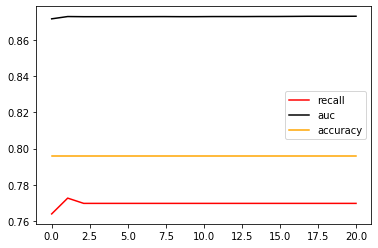

In [103]:
# Try to adjust the parameter of the SVM kernel function itself: C 
# To see if it works

import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)

recallall = []
aucall = []
scoreall = []

for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C,cache_size = 5000
             ,class_weight = "balanced" ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest)) 
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" % (C,score,recall,auc)) 
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

    
print(max(aucall),C_range[aucall.index(max(aucall))]) 
plt.figure() 
plt.plot(C_range,recallall,c="red",label="recall") 
plt.plot(C_range,aucall,c="black",label="auc") 
plt.plot(C_range,scoreall,c="orange",label="accuracy") 
plt.legend()
plt.show()

In [ ]:
#input best C to check the accuracy and recall: 

In [105]:
times = time()

clf = SVC(kernel = "linear",C=20.000000,cache_size = 5000
            ,class_weight = "balanced" ).fit(Xtrain, Ytrain)

result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("testing accuracy %f,recall is %f', auc is %f" % (score,recall,auc)) 
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.796000,recall is 0.769679', auc is 0.873280
00:12:556706


So far, the accuracy is not up to 80%. We tried to plot the roc curve to see if there were any thresholds that could be adjusted again.

### 11. ROC curve and AUC area for thresholds:

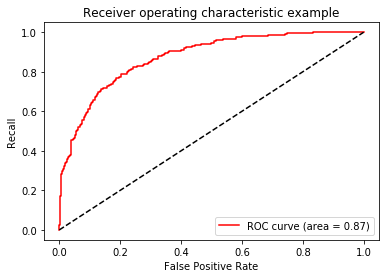

In [108]:
from sklearn.metrics import roc_curve as ROC
import matplotlib.pyplot as plt

FPR, Recall, thresholds = ROC(Ytest,clf.decision_function(Xtest),pos_label=1)
                            #ROC(real numner, confidence, and positive samples'lable is 1)
area = roc_auc_score(Ytest,clf.decision_function(Xtest))

plt.figure()
plt.plot(FPR, Recall, color='red',
         label='ROC curve (area = %0.2f)' % area) 
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  #if enter plot(start, end) will auto generate an line
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example') 
plt.legend(loc="lower right")
plt.show()

#### By using this ROC and AUC area, let's find out best threshold:

In [109]:
maxindex = (Recall - FPR).tolist().index(max(Recall - FPR))
thresholds[maxindex] #decision function return the confidence distance

-0.0369454418504469

In [110]:
from sklearn.metrics import accuracy_score as AC

times = time()

clf = SVC(kernel = "linear",C=20.000,cache_size = 5000
         ,class_weight = "balanced" ).fit(Xtrain, Ytrain)

#Build a dataframe, let confidence as one of columns
prob = pd.DataFrame(clf.decision_function(Xtest)) 

#Compare with the confidence:------------>store in y_pred
prob.loc[prob.iloc[:,0] >= thresholds[maxindex],"y_pred"]=1
prob.loc[prob.iloc[:,0] < thresholds[maxindex],"y_pred"]=0 
prob.loc[:,"y_pred"].isnull().sum() #no missing value in y_pred

0

In [111]:
prob.head()

,0,y_pred
0,2.288469,1.0
1,0.063081,1.0
2,-0.013968,1.0
3,-1.105960,0.0
4,-0.007951,1.0


In [112]:
#Check the accuracy of the model itself
times = time()
score = AC(Ytest,prob.loc[:,"y_pred"].values)
recall = recall_score(Ytest, prob.loc[:,"y_pred"])

print("testing accuracy %f,recall is %f" % (score,recall)) 
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

testing accuracy 0.794000,recall is 0.787172
00:00:004078


GBDT has better performance. 